In [69]:
import numpy as np
import pandas as pd

import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.model_selection import (cross_val_score, train_test_split, 
                                     KFold, GridSearchCV)
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [26]:
## Unpickle the data
## This is cleaned data with all features, including dummies for categorical variables.
df = pd.read_pickle('intial_data_all_features')
df.head()

,name,domestic_gross,international_gross,opening_dollars,running_time_mins,days_in_release,widest_release_in_theatres,franchise,title_length,Drama,...,Sport,Western,Not Rated,PG,PG-13,R,Unrated,Spring,Summer,Winter
0,Spider-Man: No Way Home,750429025.0,1.027000e+09,260138569.0,148,54,4336,1,23,0,...,0,0,0,0,1,0,0,0,0,1
1,Shang-Chi and the Legend of the Ten Rings,224543292.0,2.076897e+08,75388688.0,132,159,4300,1,41,0,...,0,0,0,0,1,0,0,0,0,0
2,Venom: Let There Be Carnage,213550366.0,2.885000e+08,90033210.0,97,131,4225,0,27,0,...,0,0,0,0,1,0,0,0,0,0
3,Black Widow,183651655.0,1.959797e+08,80366312.0,134,215,4275,1,11,0,...,0,0,0,0,1,0,0,0,1,0
4,F9: The Fast Saga,173005945.0,5.532236e+08,70043165.0,143,229,4203,1,17,0,...,0,0,0,0,1,0,0,0,1,0


In [27]:
df.drop_duplicates(inplace=True)
df.shape

(1071, 38)

In [28]:
## drop experiment
##df = df.drop(columns = ['opening_dollars', 'domestic_gross'])
df = df.drop(columns = ['opening_dollars', 'title_length', 'Drama', 'Fantasy',
                       'Crime', 'Family', 'Romance', 'Biography', 'Horror', 'Mystery',
                       'History', 'Sport', 'War', 'Musical', 'Documentary', 'Music',
                       'Western', 'Spring', 'Summer'])
df.head()

,name,domestic_gross,international_gross,running_time_mins,days_in_release,widest_release_in_theatres,franchise,Comedy,Action,Thriller,Adventure,Sci-Fi,Animation,Not Rated,PG,PG-13,R,Unrated,Winter
0,Spider-Man: No Way Home,750429025.0,1.027000e+09,148,54,4336,1,0,1,0,1,1,0,0,0,1,0,0,1
1,Shang-Chi and the Legend of the Ten Rings,224543292.0,2.076897e+08,132,159,4300,1,0,1,0,1,1,0,0,0,1,0,0,0
2,Venom: Let There Be Carnage,213550366.0,2.885000e+08,97,131,4225,0,0,1,1,1,1,0,0,0,1,0,0,0
3,Black Widow,183651655.0,1.959797e+08,134,215,4275,1,0,1,0,1,1,0,0,0,1,0,0,0
4,F9: The Fast Saga,173005945.0,5.532236e+08,143,229,4203,1,0,1,1,0,0,0,0,0,1,0,0,0


In [29]:
## drop audience ratings
df = df.drop(columns = ['Not Rated', 'PG', 'PG-13', 'R', 'Unrated'])
df.head()

,name,domestic_gross,international_gross,running_time_mins,days_in_release,widest_release_in_theatres,franchise,Comedy,Action,Thriller,Adventure,Sci-Fi,Animation,Winter
0,Spider-Man: No Way Home,750429025.0,1.027000e+09,148,54,4336,1,0,1,0,1,1,0,1
1,Shang-Chi and the Legend of the Ten Rings,224543292.0,2.076897e+08,132,159,4300,1,0,1,0,1,1,0,0
2,Venom: Let There Be Carnage,213550366.0,2.885000e+08,97,131,4225,0,0,1,1,1,1,0,0
3,Black Widow,183651655.0,1.959797e+08,134,215,4275,1,0,1,0,1,1,0,0
4,F9: The Fast Saga,173005945.0,5.532236e+08,143,229,4203,1,0,1,1,0,0,0,0


In [30]:
df.shape

(1071, 14)

In [31]:
## Separate target and other features
X = df.drop(columns = ['international_gross', 'name'])
y = df['international_gross']
y.head()

0    1.027000e+09
1    2.076897e+08
2    2.885000e+08
3    1.959797e+08
4    5.532236e+08
Name: international_gross, dtype: float64

In [32]:
## Split into train/validate/test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42)

In [33]:
X_train.shape, y_train.shape

((856, 12), (856,))

In [34]:
model = LinearRegression()
reg_mod = model.fit(X_train, y_train)

In [35]:
predictions = model.predict(X_train)
mean_absolute_error(y_train, predictions)

47494189.3381333

In [36]:
model.score(X_train, y_train)

0.7439972153898435

In [37]:
model.intercept_

-110280166.2373429

In [38]:
model.coef_

array([ 1.38677677e+00,  9.56682622e+05,  5.98555435e+04, -6.94764515e+03,
        2.13493509e+07, -1.44470568e+07,  2.44179721e+07,  1.28563779e+07,
        4.17590350e+07, -2.14885895e+07,  3.17459947e+07, -2.15487875e+07])

In [39]:
lm = LinearRegression()
kf = KFold(n_splits = 5, shuffle = True, random_state = 6)
lm_cv = cross_val_score(lm, X_train, y_train, cv = kf, scoring = 'r2')
print(lm_cv)

[0.84437471 0.67009646 0.6690155  0.59470039 0.73228064]


In [40]:
lm_cv_mae = cross_val_score(lm, X_train, y_train, cv = kf, scoring = 'neg_mean_absolute_error')
print(lm_cv_mae)

[-51036991.05010533 -41761193.3494683  -51711253.808376
 -47477450.37082944 -51222698.93505111]


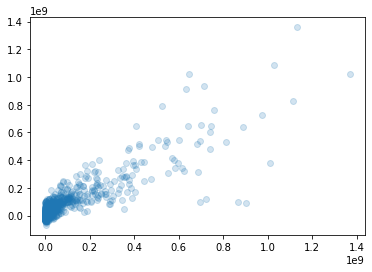

In [54]:
# Fitted vs. Actual
y_train_pred = model.predict(X_train)

plt.scatter(y_train, y_train_pred, alpha=0.2)
plt.plot([0, 100000000], [0, 100000000])
#plt.plot()

Text(0.5, 1.0, 'Residuals vs. Predictions')

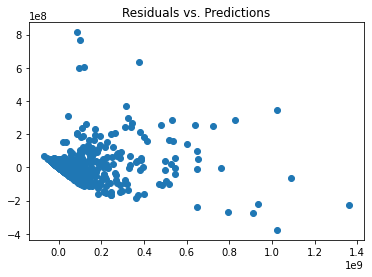

In [56]:
# Plot Residuals vs. predicted

lin_reg_residuals = y_train - y_train_pred

plt.scatter(y_train_pred, lin_reg_residuals)
plt.plot([0,100000000], [0, 0])
plt.title("Residuals vs. Predictions")

## VIF

In [43]:
## Check VIF becasue I know from MVP that there may be some multicollinearity issues.
## Code adapted from Collinearity slides

VIF_x = X_train
VIF_x = sm.add_constant(X_train)
VIF_y = y_train
sm_model = sm.OLS(VIF_y, VIF_x)
results = sm_model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     international_gross   R-squared:                       0.744
Model:                             OLS   Adj. R-squared:                  0.740
Method:                  Least Squares   F-statistic:                     204.2
Date:                 Mon, 21 Feb 2022   Prob (F-statistic):          9.88e-240
Time:                         20:26:51   Log-Likelihood:                -16858.
No. Observations:                  856   AIC:                         3.374e+04
Df Residuals:                      843   BIC:                         3.380e+04
Df Model:                           12                                         
Covariance Type:             nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                      -1.103e+08   2.17e+07     -5.089      0.000   -1.53e+08   -6.77e+07
domestic_gross                 1.3868      0.043     32.130      0.000       1.302       1.471
running_time_mins           9.567e+05   1.74e+05      5.501      0.000    6.15e+05     1.3e+06
days_in_release             5.986e+04   2.45e+04      2.438      0.015    1.17e+04    1.08e+05
widest_release_in_theatres -6947.6451   2834.993     -2.451      0.014   -1.25e+04   -1383.171
franchise                   2.135e+07   8.86e+06      2.411      0.016    3.97e+06    3.87e+07
Comedy                     -1.445e+07    7.3e+06     -1.980      0.048   -2.88e+07   -1.26e+05
Action                      2.442e+07   7.91e+06      3.087      0.002    8.89e+06    3.99e+07
Thriller                    1.286e+07   7.51e+06      1.712      0.087   -1.88e+06    2.76e+07
Adventure                   4.176e+07   8.93e+06      4.674      0.000    2.42e+07    5.93e+07
Sci-Fi                     -2.149e+07   8.99e+06     -2.391      0.017   -3.91e+07   -3.85e+06
Animation                   3.175e+07   1.21e+07      2.617      0.009    7.94e+06    5.56e+07
Winter                     -2.155e+07   7.37e+06     -2.925      0.004    -3.6e+07   -7.09e+06
==============================================================================
Omnibus:                      705.860   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            25979.061
Skew:                           3.472   Prob(JB):                         0.00
Kurtosis:                      29.080   Cond. No.                     8.01e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.01e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [44]:
variables = results.model.exog
vif = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
vif

[52.99394172380247,
 1.9068670067068192,
 1.263645713183527,
 1.1911112319362274,
 1.7821278389517152,
 1.5172902980843297,
 1.3634608743351457,
 1.5059654840195875,
 1.3401782651023288,
 1.8670880646157477,
 1.2891746949024385,
 1.5315705011331258,
 1.152338952478504]

In [61]:
## Let's try Lasso since we still have a lot of features and it will eliminate some
## Code adapted from Lasso slides and Lasso exercise answers

std = StandardScaler()
std.fit(X_train.values)
## apply the scaler to the train set
X_tr = std.transform(X_train.values)
## Apply the scaler to the test set
X_te = std.transform(X_test.values)
lasso = Lasso(alpha = 10000)
lasso.fit(X_tr, y_train)
train_r_squared = lasso.score(X_tr, y_train)
test_r_squared = lasso.score(X_te, y_test)
print(train_r_squared)
print(test_r_squared)
print(list(zip(X_train.columns, lasso.coef_)))
print(len(list(zip(X_train.columns, lasso.coef_))))


0.7439971469736147
0.7375141324450161
[('domestic_gross', 132047778.67975283), ('running_time_mins', 18394510.016757313), ('days_in_release', 7902056.120103302), ('widest_release_in_theatres', -9702715.124201084), ('franchise', 8824942.207268428), ('Comedy', -6875098.915689217), ('Action', 11268373.202895634), ('Thriller', 5883108.686745535), ('Adventure', 19001020.182018816), ('Sci-Fi', -8061059.473861324), ('Animation', 9623582.117133718), ('Winter', -9326850.07573426)]
12


In [98]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np
alphas = 10**np.linspace(-2,2,200)
lasso_model = LassoCV(alphas = alphas, cv=5)
lasso_model.fit(X_tr, y_train)
r_squared_train = lasso_model.score(X_tr, y_train)
r_squared_test = lasso_model.score(X_te, y_test)
alpha = lasso_model.alpha_
print(r_squared_train)
print(r_squared_test)
print(alpha)

prediction = lasso_model.predict(X_te)


0.7439972153830575
0.7375118524460988
100.0


Text(0, 0.5, 'Predicted')

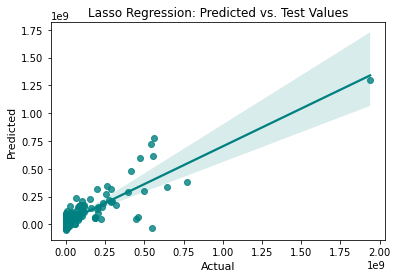

In [118]:
plot = sns.regplot(x = y_test, y = prediction, data = df, color = 'teal')
plot.set(title = "Lasso Regression: Predicted vs. Test Values")
plot.set_xlabel("Actual", fontsize = 11)
plot.set_ylabel("Predicted", fontsize = 11)



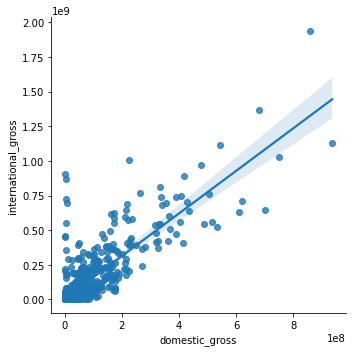

In [108]:
sns.lmplot(x='domestic_gross', y='international_gross', data = df);

In [83]:
#sns.regplot(x="y_train", y="y_test", data=df)

Computing regularization path using the LARS ...


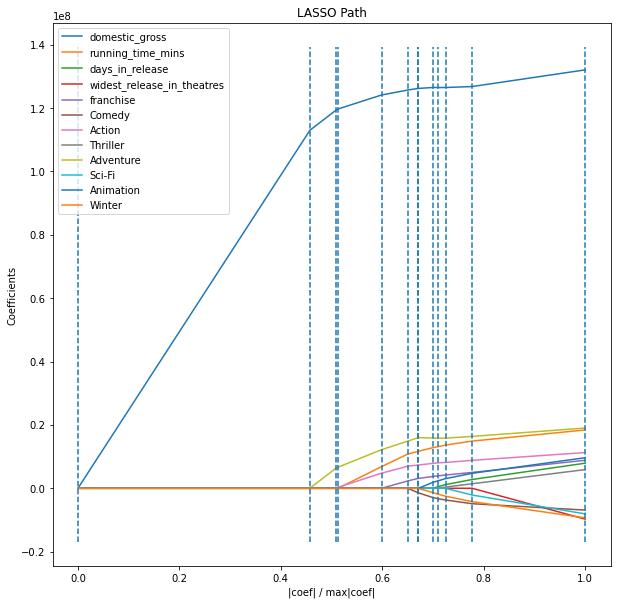

In [47]:
from sklearn.linear_model import lars_path
import matplotlib.pyplot as plt

alphas = 10**np.linspace(-2,2,200)

print("Computing regularization path using the LARS ...")
alphas, _, coefs = lars_path(X_tr, y_train.values, method='lasso')

# plotting the LARS path

xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

plt.figure(figsize=(10,10))
plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle='dashed')
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Coefficients')
plt.title('LASSO Path')
plt.axis('tight')
plt.legend(X_train.columns)
plt.show()

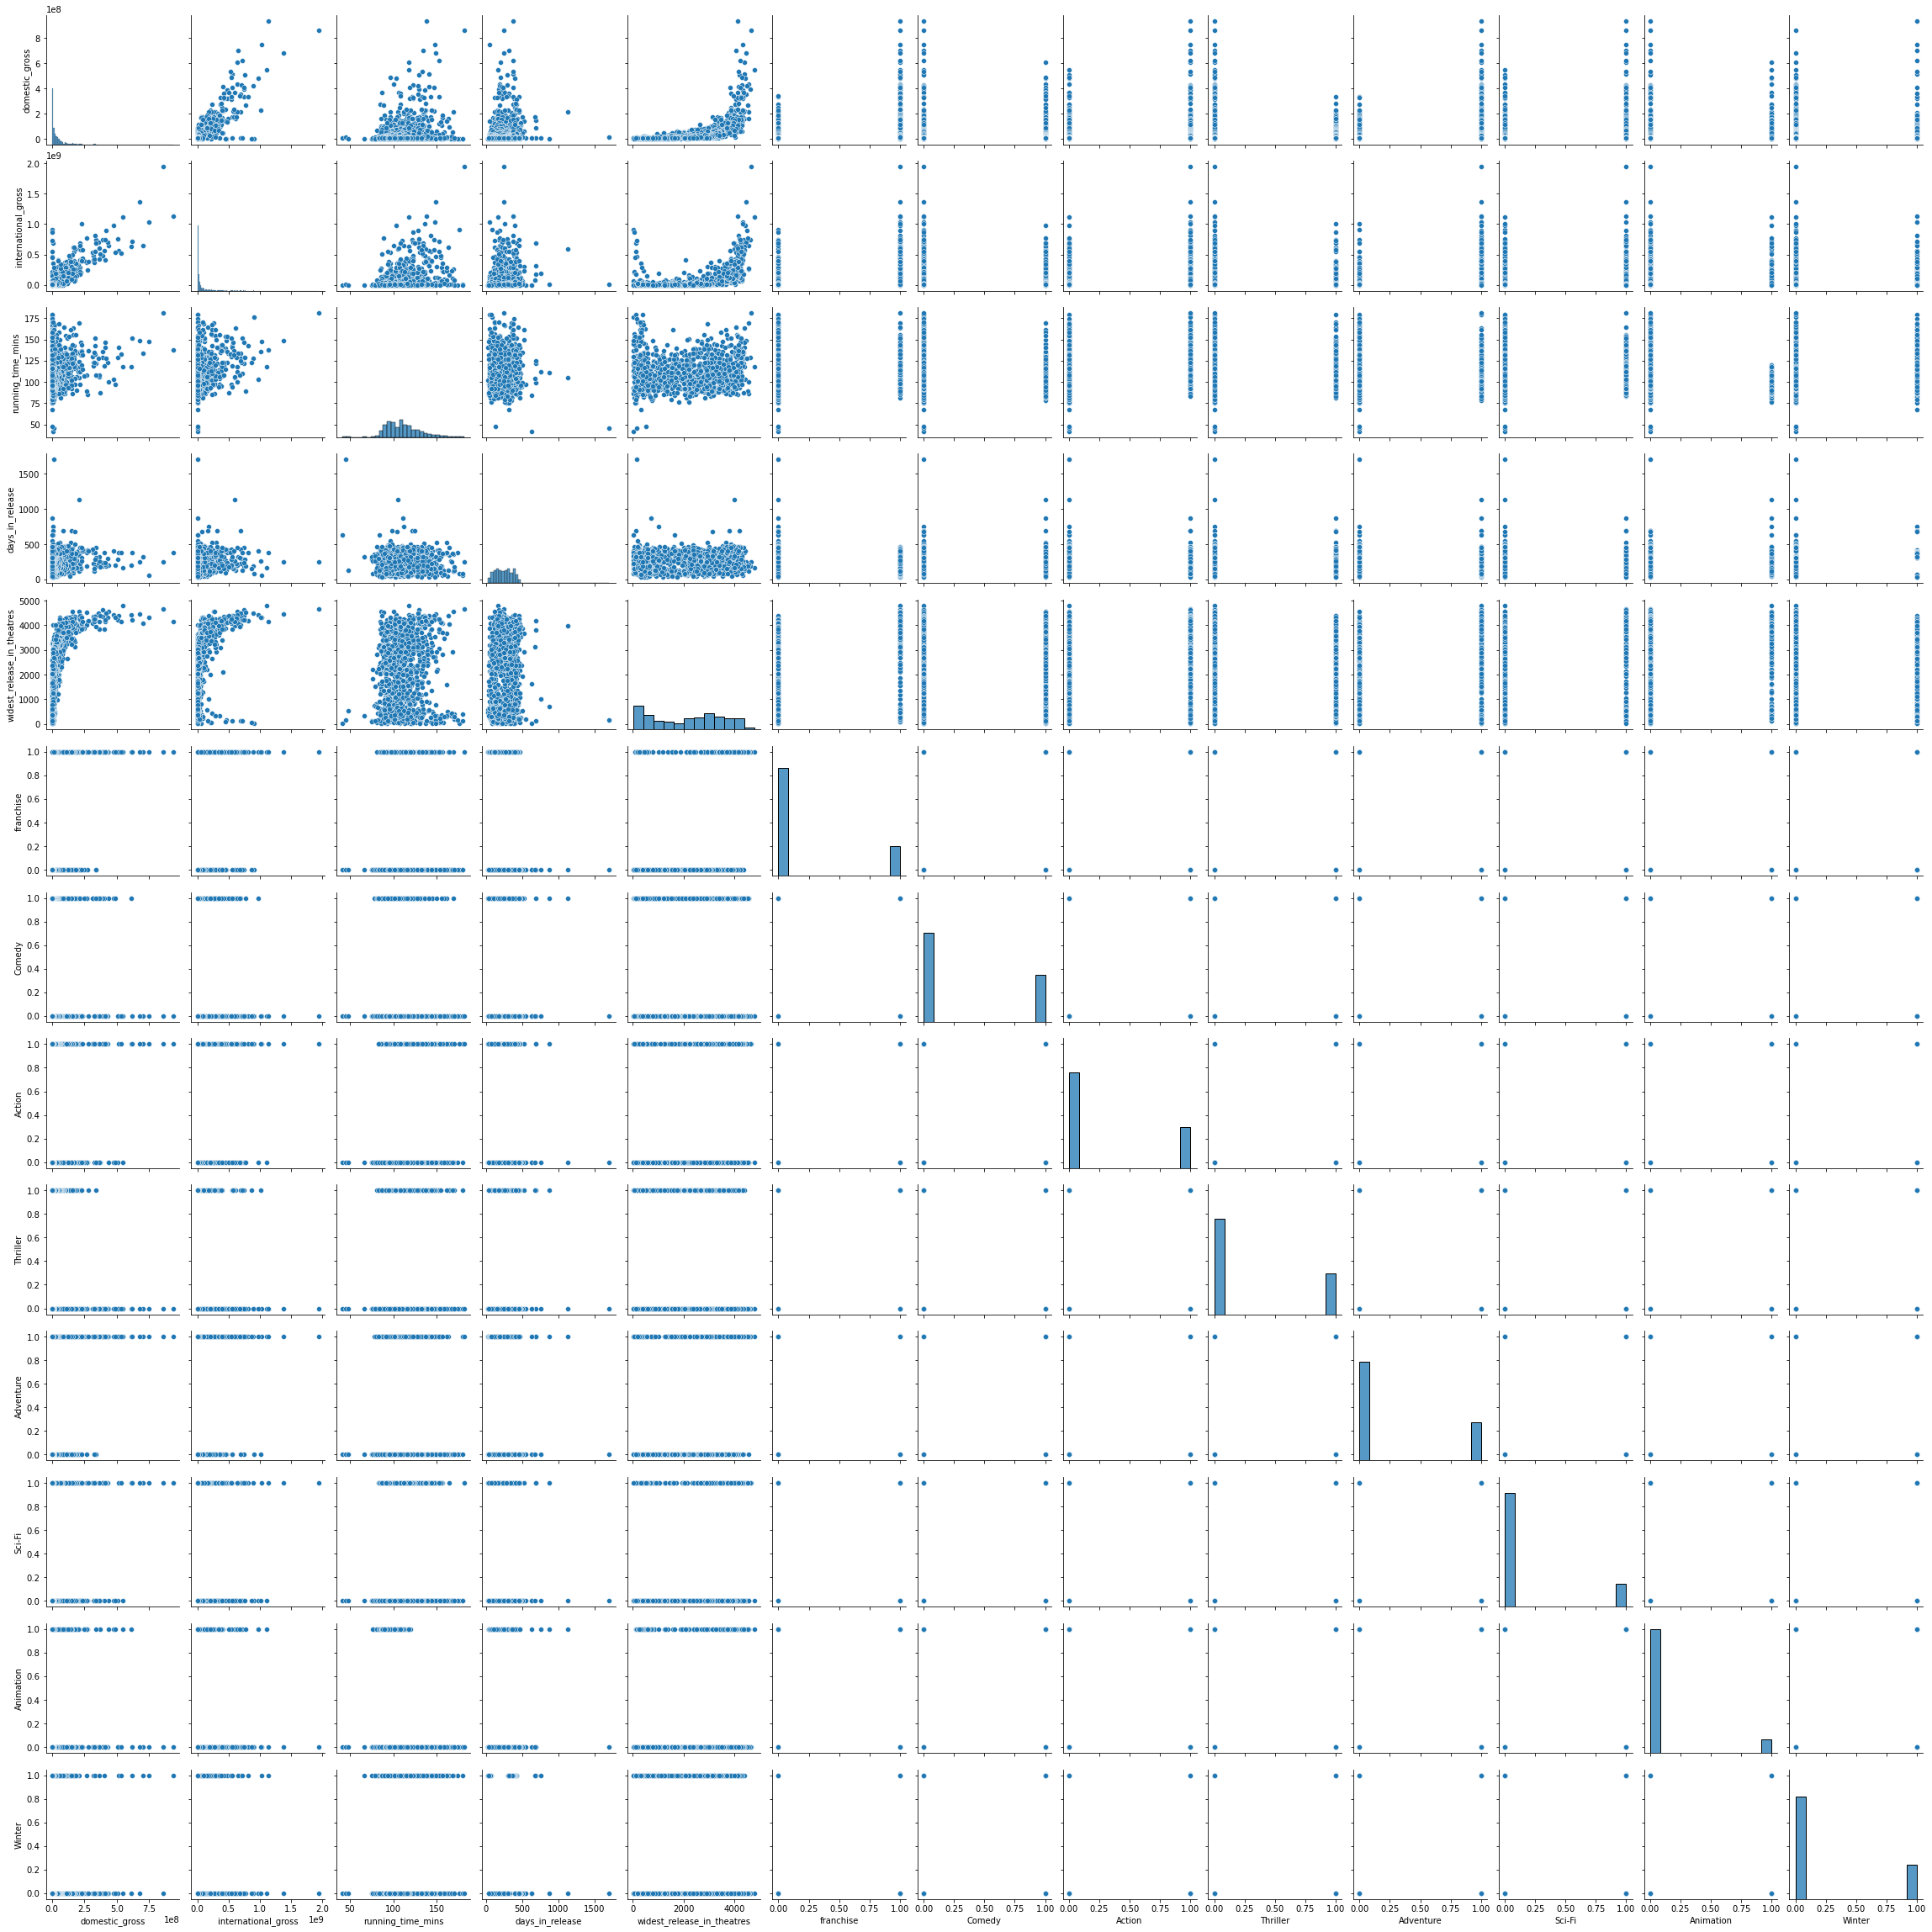

In [57]:
sns.pairplot(df)